In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/covertype-forest-cover-types/covertype.csv")

df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

X = df.drop('Cover_Type', axis=1)  
y = df['Cover_Type']       

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
rf = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9379964372692615

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.89      0.79      0.84       549
           5       0.93      0.74      0.83      1899
           6       0.90      0.84      0.87      3473
           7       0.97      0.94      0.96      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [14]:
rf = RandomForestClassifier(
    n_estimators=100,min_samples_split= 2, random_state=42, class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9379964372692615

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.89      0.79      0.84       549
           5       0.93      0.74      0.83      1899
           6       0.90      0.84      0.87      3473
           7       0.97      0.94      0.96      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [2]:
rf = RandomForestClassifier(
    n_estimators=500, random_state=42, class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9393475211483352

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.92      0.94     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.90      0.80      0.85       549
           5       0.94      0.76      0.84      1899
           6       0.91      0.85      0.88      3473
           7       0.97      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



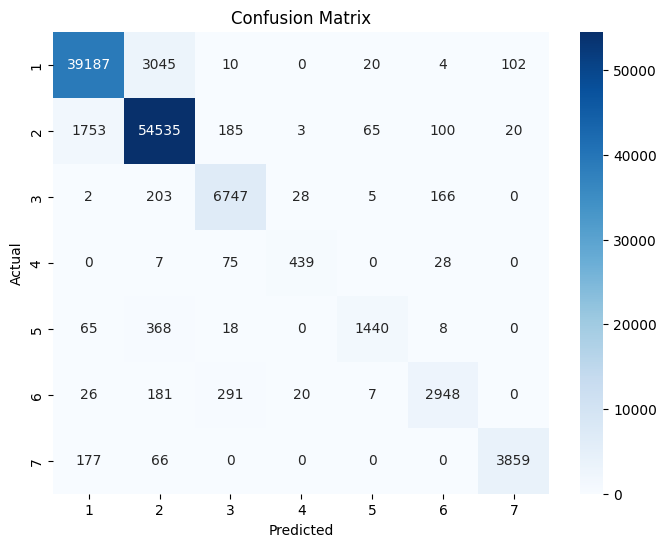

In [3]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


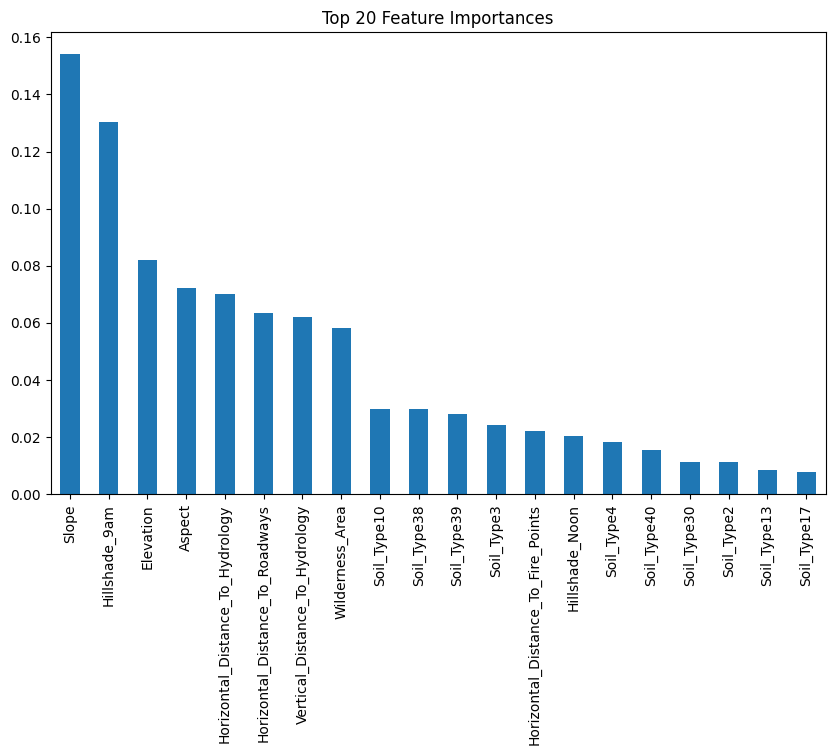

In [4]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances[:20].plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.show()

In [15]:
from xgboost import XGBClassifier

y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, y_train_xgb)

y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 1  # إعادة الlabels الأصلية

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.8147896353794652

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.70      0.76     42368
           2       0.78      0.90      0.84     56661
           3       0.88      0.89      0.88      7151
           4       0.88      0.82      0.85       549
           5       0.90      0.57      0.70      1899
           6       0.83      0.76      0.79      3473
           7       0.96      0.87      0.91      4102

    accuracy                           0.81    116203
   macro avg       0.87      0.79      0.82    116203
weighted avg       0.82      0.81      0.81    116203



In [16]:
from xgboost import XGBClassifier

y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, y_train_xgb)

y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 1  # إعادة الlabels الأصلية

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7790590604373381

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.61      0.70     42368
           2       0.73      0.90      0.81     56661
           3       0.88      0.88      0.88      7151
           4       0.88      0.81      0.84       549
           5       0.92      0.50      0.65      1899
           6       0.83      0.72      0.77      3473
           7       0.96      0.83      0.89      4102

    accuracy                           0.78    116203
   macro avg       0.86      0.75      0.79    116203
weighted avg       0.79      0.78      0.77    116203



In [5]:
from xgboost import XGBClassifier

y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, y_train_xgb)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 1  # إعادة الlabels الأصلية

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.9291326385721539

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92     42368
           2       0.92      0.95      0.94     56661
           3       0.94      0.95      0.94      7151
           4       0.89      0.84      0.87       549
           5       0.93      0.83      0.87      1899
           6       0.91      0.88      0.90      3473
           7       0.97      0.96      0.97      4102

    accuracy                           0.93    116203
   macro avg       0.93      0.90      0.91    116203
weighted avg       0.93      0.93      0.93    116203



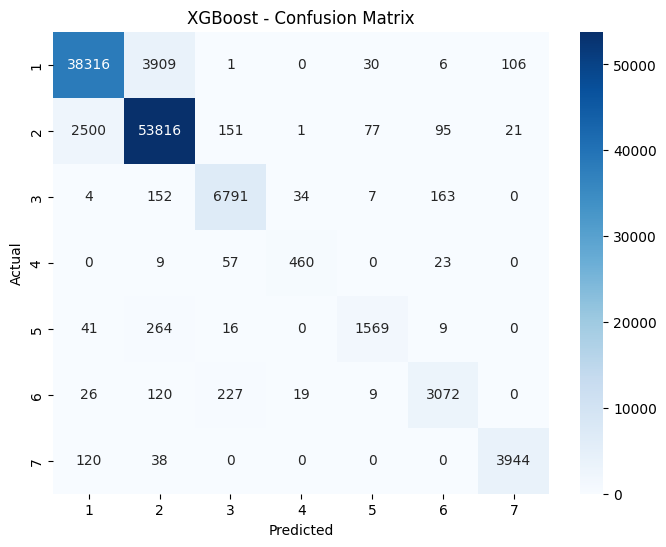

In [7]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()


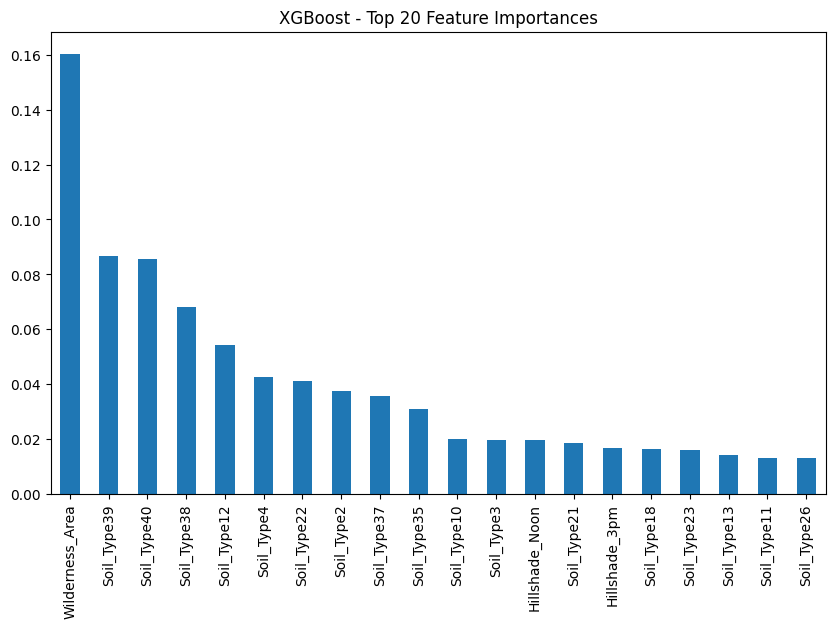

In [8]:
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances_xgb[:20].plot(kind='bar')
plt.title("XGBoost - Top 20 Feature Importances")
plt.show()